# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('E:\DataSets\IOT Sensor Data\Motion Detection.csv') #loading Dataset
df.head(10)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
5,1.594512e+09,1c:bf:ce:15:ec:4d,0.004391,77.900002,True,0.007009,False,0.018589,27.000000
6,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
7,1.594512e+09,00:0f:00:70:91:0a,0.002938,76.000000,False,0.005241,False,0.013628,19.700001
8,1.594512e+09,1c:bf:ce:15:ec:4d,0.004345,77.900002,True,0.006957,False,0.018440,27.000000
9,1.594512e+09,b8:27:eb:bf:9d:51,0.004970,50.900000,False,0.007667,False,0.020457,22.600000


# Basic Insights

In [4]:
print("Dimentions of the Dataset",df.shape)

Dimentions of the Dataset (405184, 9)


In [5]:
df.dtypes

ts          float64
device       object
co          float64
humidity    float64
light          bool
lpg         float64
motion         bool
smoke       float64
temp        float64
dtype: object

In [6]:
df.isnull().sum()

ts          0
device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64

<br>
<font size=3 color=green>
<b>Looking at the above results, we come to know the following details:</b><br>
    <ul>
         <li>There are 405184 rows, and 9 columns in the given dataset.<br>
         <li>There are 6 columns of type float64 (ts,co,humidity,lpg,smoke,temperature), 2 columns containing boolean values(light, motion) and 1 column of categorical type(device).<br>
         <li>The device column contains the device Id of the sensors in which the readings are recorded.<br>
         <li>Out of the 9 columns, co, humidity, lpg, smoke, temp and light are the 6 feature variables and motion is the target variable.<br>
         <li>Also there aren't any null values in the dataset, which means the dataset is clean and we can proceed with further exploration.<br>
     </ul>
</font>
<br>

# Exploratory Data Analysis

In [7]:
print("Cases Detected with Motion")
print(df['motion'].value_counts())

Cases Detected with Motion
False    404702
True        482
Name: motion, dtype: int64


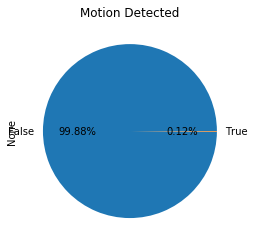

In [8]:
df.groupby('motion').size().plot(kind='pie',autopct='%1.2f%%',title="Motion Detected")

False    292657
True     112527
Name: light, dtype: int64


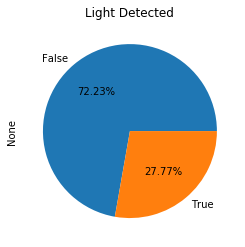

In [9]:
df.groupby('light').size().plot(kind='pie',autopct='%1.2f%%',title="Light Detected")
print(df['light'].value_counts())

In [10]:
print("Contribution by each Device\n")
print(df['device'].value_counts())

Contribution by each Device

b8:27:eb:bf:9d:51    187451
00:0f:00:70:91:0a    111815
1c:bf:ce:15:ec:4d    105918
Name: device, dtype: int64


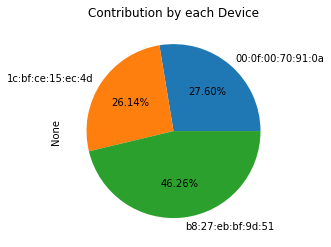

In [11]:
df.groupby('device').size().plot(kind='pie',autopct='%1.2f%%',title="Contribution by each Device")

In [12]:
#Converting TimeStamp Value to proper Datatype
df['ts']=pd.to_datetime(df['ts'],unit='s')
df.dtypes

ts          datetime64[ns]
device              object
co                 float64
humidity           float64
light                 bool
lpg                float64
motion                bool
smoke              float64
temp               float64
dtype: object

In [13]:
#Encoding the Device Names
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['device'] = labelencoder.fit_transform(df['device'])
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,2020-07-12 00:01:34.385974407,2,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,2020-07-12 00:01:34.735567570,0,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,2020-07-12 00:01:38.073572636,2,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,2020-07-12 00:01:39.589146137,1,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,2020-07-12 00:01:41.761234999,2,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


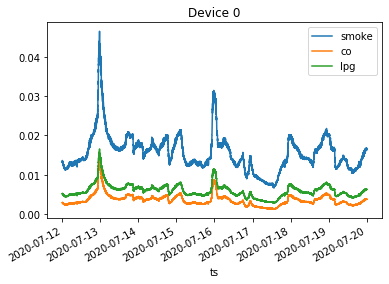

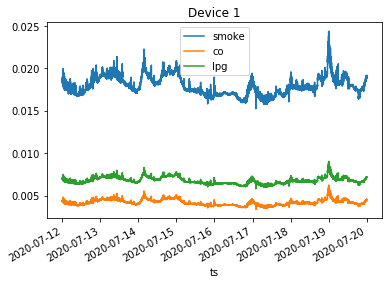

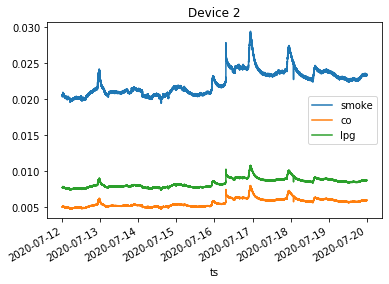

In [14]:
#Extracting DataFrame Corresponding to each Device plotting the readings
device_df=[]
for i in range(0,3):
    device_df.append(df[df['device']==i])
    ax=plt.gca()
    device_df[i].plot(kind='line',x='ts',y='smoke',ax=ax,title='Device '+str(i))
    device_df[i].plot(kind='line',x='ts',y='co',ax=ax)
    device_df[i].plot(kind='line',x='ts',y='lpg',ax=ax)
    plt.show()

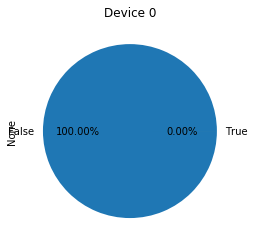

False    111812
True          3
Name: motion, dtype: int64


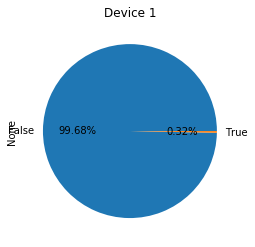

False    105583
True        335
Name: motion, dtype: int64


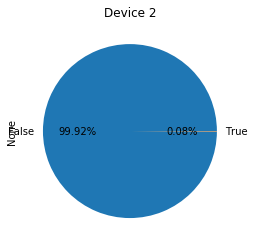

False    187307
True        144
Name: motion, dtype: int64


In [15]:
#Motion Detected by each Sensor
for i,device in enumerate(device_df):
    device.groupby('motion').size().plot(kind='pie',autopct='%1.2f%%',title="Device "+str(i))
    plt.show()
    print(device['motion'].value_counts())

Light Detected in Each Device


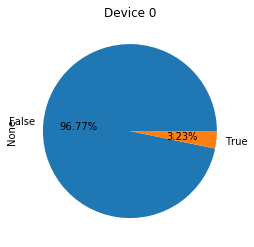

False    108207
True       3608
Name: light, dtype: int64


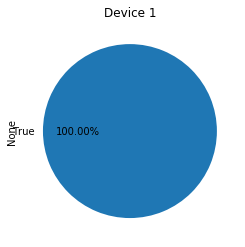

True    105918
Name: light, dtype: int64


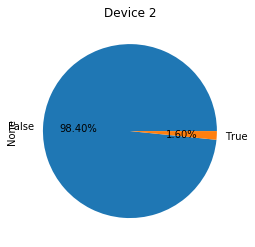

False    184450
True       3001
Name: light, dtype: int64


In [16]:
#Light Detected by each Sensor
print("Light Detected in Each Device")
for i,device in enumerate(device_df):
    device.groupby('light').size().plot(kind='pie',autopct='%1.2f%%',title="Device "+str(i))
    plt.show()
    print(device['light'].value_counts())

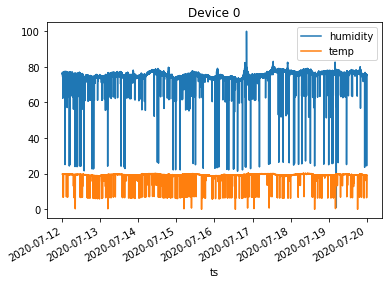

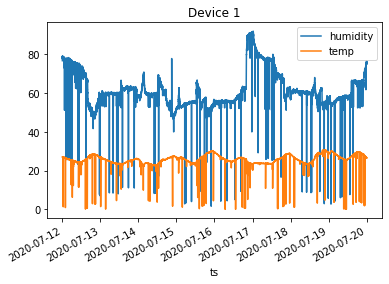

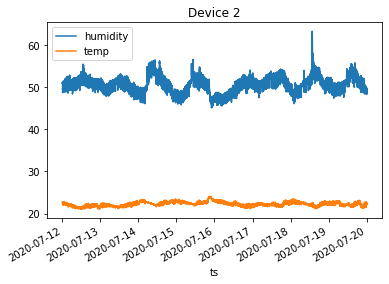

In [17]:
#Humidity and Temperature Values
for i,device in enumerate(device_df):
    ax=plt.gca()
    device.plot(kind='line',x='ts',y='humidity',ax=ax,title='Device '+str(i))
    device.plot(kind='line',x='ts',y='temp',ax=ax)
    plt.show()

,device,co,humidity,light,lpg,motion,smoke,temp
device,1.000000,0.698928,-0.902674,-0.141967,0.714322,0.004355,0.712108,0.341314
co,0.698928,1.000000,-0.656750,-0.230197,0.997331,-0.000706,0.998192,0.110905
humidity,-0.902674,-0.656750,1.000000,0.079703,-0.672113,-0.009826,-0.669863,-0.410427
light,-0.141967,-0.230197,0.079703,1.000000,-0.208926,0.033594,-0.212969,0.747485
lpg,0.714322,0.997331,-0.672113,-0.208926,1.000000,0.000232,0.999916,0.136396
motion,0.004355,-0.000706,-0.009826,0.033594,0.000232,1.000000,0.000062,0.037649
smoke,0.712108,0.998192,-0.669863,-0.212969,0.999916,0.000062,1.000000,0.131891
temp,0.341314,0.110905,-0.410427,0.747485,0.136396,0.037649,0.131891,1.000000


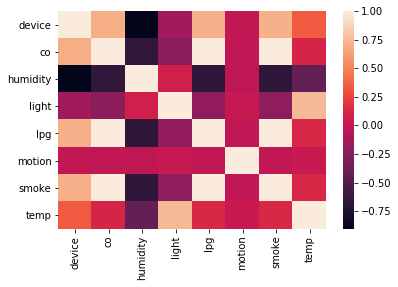

In [18]:
#Finding the Correlation between the Variables
sns.heatmap(df.corr())
df.corr()

# Insights Gained

#To be Formatted and Filled

In [19]:
#Encoding the Target Variable
df['motion'] = labelencoder.fit_transform(df['motion'])
df['light'] = labelencoder.fit_transform(df['light'])

#Dropping the Timestamp Values
df.drop('ts',axis=1,inplace=True)
df.head()

,device,co,humidity,light,lpg,motion,smoke,temp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000
1,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001
2,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000
3,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000
4,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000


# Training ML Classifiers

In [20]:
#Splittng Dataset into featues and target Variables
X=df.drop('motion',axis=1)
Y=df['motion']
print("Features Shape ",X.shape)
X.head()

Features Shape  (405184, 7)


,device,co,humidity,light,lpg,smoke,temp
0,2,0.004956,51.000000,0,0.007651,0.020411,22.700000
1,0,0.002840,76.000000,0,0.005114,0.013275,19.700001
2,2,0.004976,50.900000,0,0.007673,0.020475,22.600000
3,1,0.004403,76.800003,1,0.007023,0.018628,27.000000
4,2,0.004967,50.900000,0,0.007664,0.020448,22.600000


In [21]:
print("Target Shape ",Y.shape)
Y.head()

Target Shape  (405184,)


0    0
1    0
2    0
3    0
4    0
Name: motion, dtype: int64

In [23]:
#Splitting Data into Training and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

In [24]:
#Training Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
CM = pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
CM

Predicted,0,All
True,,
0,20245,20245
1,15,15
All,20260,20260


In [26]:
print("Accuracy Score of Logistic Regression: ",accuracy_score(y_test,y_predict))

Accuracy Score of Logistic Regression:  0.9992596248766041


In [27]:
print("Classification Report: Logistic Regression")
cr = classification_report(y_test, y_pred)
print(cr)

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20245
           1       0.00      0.00      0.00        15

    accuracy                           1.00     20260
   macro avg       0.50      0.50      0.50     20260
weighted avg       1.00      1.00      1.00     20260



S:\Anaconda Navigator\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#Training Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [29]:
CM = pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
CM

Predicted,0,All
True,,
0,20245,20245
1,15,15
All,20260,20260


In [30]:
print("Accuracy Score of Naive Bayes Classifier: ",accuracy_score(y_test,y_pred))

Accuracy Score of Naive Bayes Classifier:  0.9992596248766041


In [31]:
print("Classification Report:")
cr = classification_report(y_test, y_pred)
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20245
           1       0.00      0.00      0.00        15

    accuracy                           1.00     20260
   macro avg       0.50      0.50      0.50     20260
weighted avg       1.00      1.00      1.00     20260



S:\Anaconda Navigator\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [69]:
CM = pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
CM

Predicted,0,All
True,,
0,20245,20245
1,15,15
All,20260,20260


In [70]:
print("Classification Report:")
cr = classification_report(y_test, y_pred)
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20245
           1       0.00      0.00      0.00        15

    accuracy                           1.00     20260
   macro avg       0.50      0.50      0.50     20260
weighted avg       1.00      1.00      1.00     20260



S:\Anaconda Navigator\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [72]:
CM = pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
CM

Predicted,0,All
True,,
0,20245,20245
1,15,15
All,20260,20260


In [73]:
print("Classification Report:")
cr = classification_report(y_test, y_pred)
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20245
           1       0.00      0.00      0.00        15

    accuracy                           1.00     20260
   macro avg       0.50      0.50      0.50     20260
weighted avg       1.00      1.00      1.00     20260



S:\Anaconda Navigator\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [63]:
CM = pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
CM

Predicted,0,All
True,,
0,20245,20245
1,15,15
All,20260,20260


In [64]:
print("Classification Report:")
cr = classification_report(y_test, y_pred)
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20245
           1       0.00      0.00      0.00        15

    accuracy                           1.00     20260
   macro avg       0.50      0.50      0.50     20260
weighted avg       1.00      1.00      1.00     20260



S:\Anaconda Navigator\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Inferences Gained 

<br>
<font size=3 color=darkblue>
<b>Looking at the above results, we come to know the following details:</b><br>
    <ul>
         <li>All the 3 ML Classifiers perfrom at equal standards with the dataset<br>
         <li>Though the Accuracies obtained by the classifiers is pretty high(99.92 %), all the classifiers failed to detect instances where motion is present. <br>
         <li>The low precision and recall scores for the minority class supports this fact(0.0 for both precision and recall)<br>
         <li>The results obtained substatiates the fact that there arent enough instances of the minority class i,e motion detected to train the model with in order to get better results.<br>
         <li>Hence we go for applying an oversampling technique SMOTE to the same and evaluvate it against the same ML Classifiers and compare its results<br>
     </ul>
</font>
<br>

In [33]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(categorical_features=[0,3],sampling_strategy=0.4,k_neighbors =5) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))

After OverSampling, the shape of train_X: (538239, 7)
After OverSampling, the shape of train_y: (538239,) 

After OverSampling, counts of label '0': 384457
After OverSampling, counts of label '1': 153782


In [34]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)

In [35]:
CM = pd.crosstab(y_test,y_predict, rownames=['True'], colnames=['Predicted'], margins=True)
CM

Predicted,0,1,All
True,,,
0,17970,2275,20245
1,6,9,15
All,17976,2284,20260


In [36]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     20245
           1       0.00      0.60      0.01        15

    accuracy                           0.89     20260
   macro avg       0.50      0.74      0.47     20260
weighted avg       1.00      0.89      0.94     20260



In [48]:
model=GaussianNB()
model.fit(X_train_res,y_train_res)
y_pred=model.predict(X_test)

In [49]:
CM = pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
CM

Predicted,0,1,All
True,,,
0,15362,4883,20245
1,5,10,15
All,15367,4893,20260


In [51]:
print("Classification Report: Naive Bayes Classifier")
cr = classification_report(y_test, y_pred)
print(cr)

Classification Report: Naive Bayes Classifier
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     20245
           1       0.00      0.67      0.00        15

    accuracy                           0.76     20260
   macro avg       0.50      0.71      0.43     20260
weighted avg       1.00      0.76      0.86     20260



In [74]:
model=DecisionTreeClassifier(criterion='gini',max_depth=5)
model.fit(X_train_res,y_train_res)
y_pred=model.predict(X_test)

In [75]:
CM = pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
CM

Predicted,0,1,All
True,,,
0,18323,1922,20245
1,6,9,15
All,18329,1931,20260


In [76]:
print("Classification Report: Descition Tree Classifier")
cr = classification_report(y_test, y_pred)
print(cr)

Classification Report: Naive Bayes Classifier
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     20245
           1       0.00      0.60      0.01        15

    accuracy                           0.90     20260
   macro avg       0.50      0.75      0.48     20260
weighted avg       1.00      0.90      0.95     20260



In [58]:
model=AdaBoostClassifier()
model.fit(X_train_res,y_train_res)
y_pred=model.predict(X_test)

In [59]:
CM = pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
CM

Predicted,0,1,All
True,,,
0,18118,2127,20245
1,8,7,15
All,18126,2134,20260


In [61]:
print("Classification Report: AdaBoost")
cr = classification_report(y_test, y_pred)
print(cr)

Classification Report: AdaBoost
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     20245
           1       0.00      0.47      0.01        15

    accuracy                           0.89     20260
   macro avg       0.50      0.68      0.48     20260
weighted avg       1.00      0.89      0.94     20260



In [65]:
model=XGBClassifier()
model.fit(X_train_res,y_train_res)
y_pred=model.predict(X_test)

In [66]:
CM = pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
CM

Predicted,0,1,All
True,,,
0,18721,1524,20245
1,9,6,15
All,18730,1530,20260


In [67]:
print("Classification Report: XGBoost")
cr = classification_report(y_test, y_pred)
print(cr)

Classification Report: AdaBoost
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     20245
           1       0.00      0.40      0.01        15

    accuracy                           0.92     20260
   macro avg       0.50      0.66      0.48     20260
weighted avg       1.00      0.92      0.96     20260

